In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.classifier import Adaline
from sklearn.model_selection import train_test_split

In [6]:
boston = load_boston()

In [7]:
boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
X = boston.data[:,[6,11]]
Y = boston.target

In [10]:
class AdalineRegressor:
    def __init__(self):
        pass
    
    def fit(self, X_train, Y_train):
        self.w = np.matmul(inv(np.matmul(X_train.T , X_train)), np.matmul(X_train.T , Y_train))
        
    def predict(self, X_test):
        Y_pred = np.matmul(X_test , self.w)
        return Y_pred
    
    def evaluate(self, X_test , Y_test):
        Y_pred = np.matmul(X_test , self.w)
        sub = np.abs(Y_test - Y_pred)
        average = np.mean(sub)
        return average
    
    def evaluate_mae(self,X_test , Y_test):
        Y_pred = np.matmul(X_test , self.w)
        mae = np.abs(Y_test - Y_pred).mean()
        return mae
    
    def evaluate_mse(self,X_test , Y_test):
        Y_pred = np.matmul(X_test , self.w)
        mse = np.square(np.subtract(Y_test , Y_pred)).mean()
        return mse

In [11]:
model = AdalineRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=4)
model.fit(X_train , Y_train)
w = model.w
print(w)
mae = model.evaluate_mae(X_test, Y_test)
print(mae)
mse = model.evaluate_mse(X_test, Y_test)
print(mse)

[-0.00453815  0.06087811]
7.28973024596847
97.53408531630147


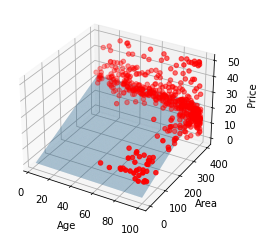

In [12]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

x_range = np.arange(X[:,0].min(), X[:,0].max())
y_range = np.arange(X[:,1].min(), X[:,1].max())

x, y = np.meshgrid(x_range, y_range)

z = x * w[0] + y * w[1]

ax.plot_surface(x, y, z, rstride=1, cstride=1, alpha = 0.4)

ax.scatter(X[:,0], X[:,1], Y, c='red')

ax.set_xlabel('Age')
ax.set_ylabel('Area')
ax.set_zlabel('Price')

plt.show()